# House Price Prediction
**Workspace for the [Machine Learning course](https://www.kaggle.com/learn/machine-learning).**


Reading the csv files and printing basic details about the data

In [48]:
import pandas as pd

pd.set_option('display.max_rows', 5)
# main_file_path = '../input/house-prices-advanced-regression-techniques/train.csv' # this is the path to the Iowa data that you will use
#test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
test = pd.read_csv('test.csv')
main_file_path = "train.csv"
data = pd.read_csv(main_file_path)

print(data.describe())
print(data.head())
print(data.columns)

            Id  MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.00  1460.00000  1201.000000    1460.000000  1460.000000   
mean    730.50    56.89726    70.049958   10516.828082     6.099315   
...        ...         ...          ...            ...          ...   
75%    1095.25    70.00000    80.000000   11601.500000     7.000000   
max    1460.00   190.00000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
...            ...          ...           ...          ...          ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...       1460.000000  1460.000000

**Correlation Plot**

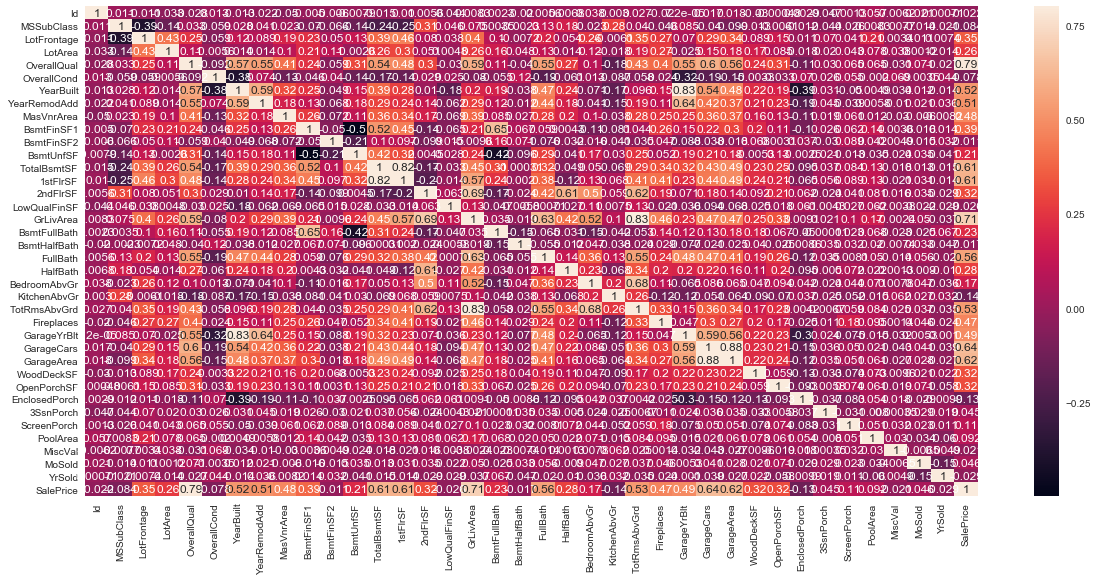

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

corrmat = data.corr()
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corrmat, vmax=.8, annot=True);

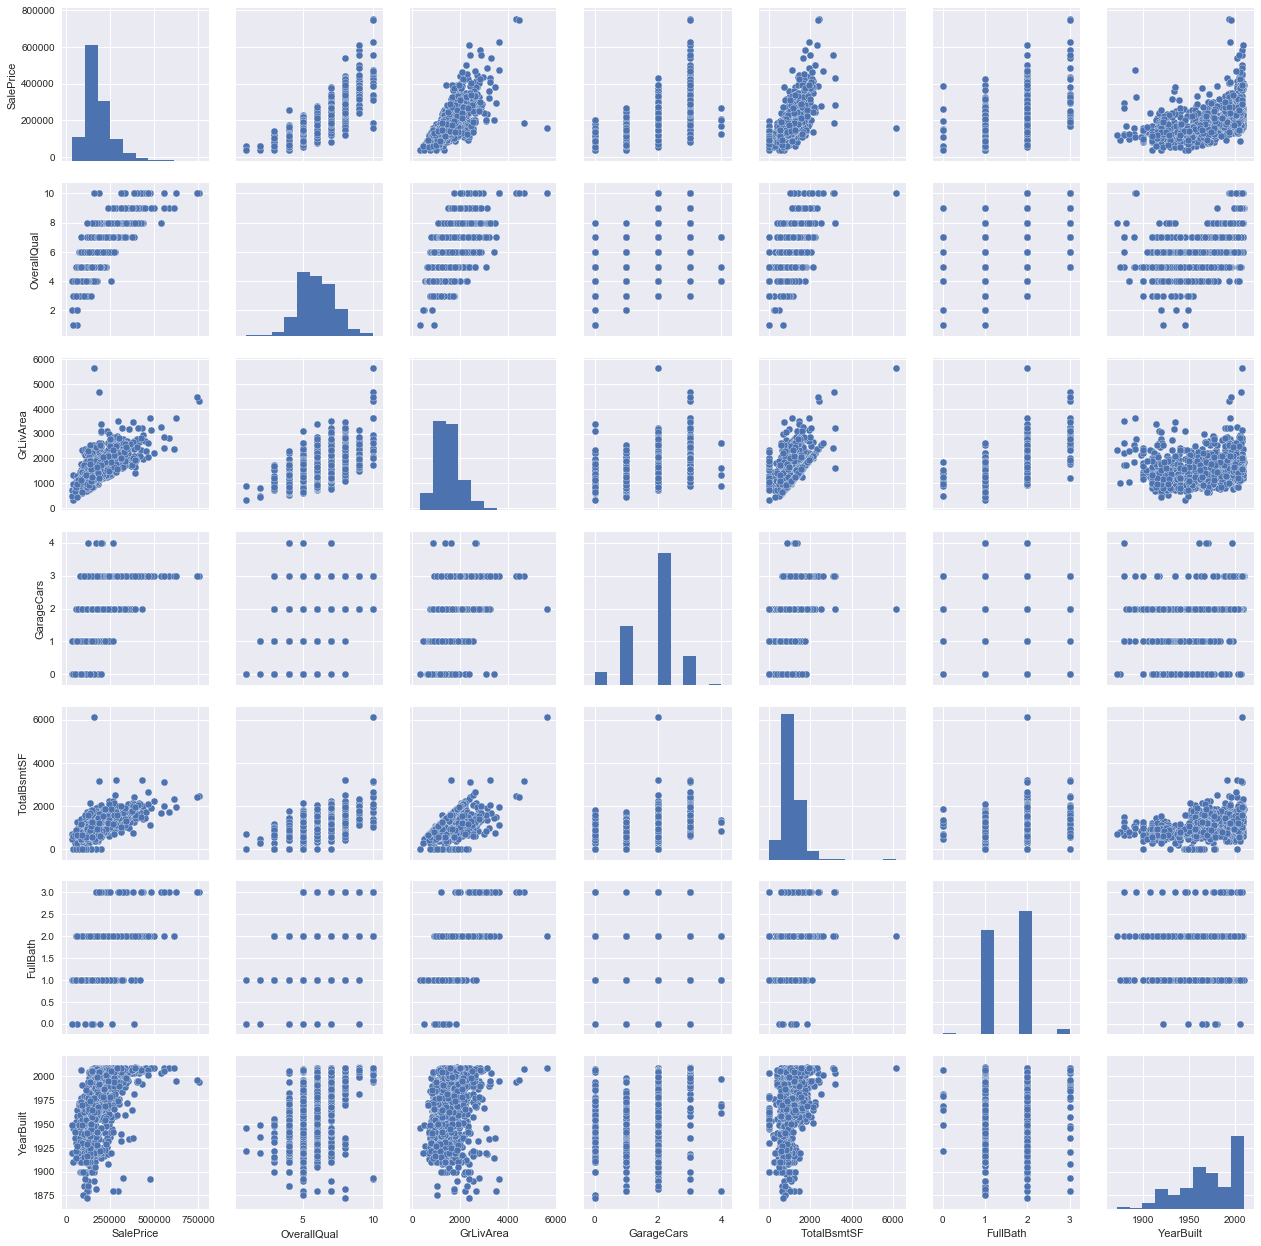

In [50]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(data[cols], size = 2.5)
plt.show();

**Analysis on SalePrice**


 mu = 180921.20 and sigma = 79415.29



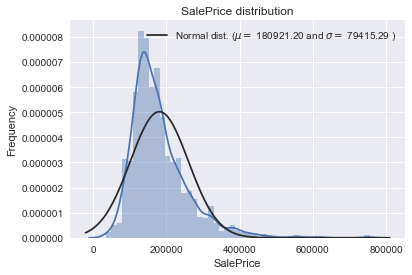

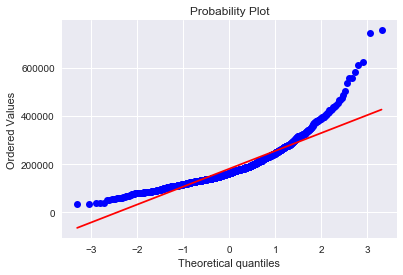

In [51]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(data['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data['SalePrice'], plot=plt)
plt.show()

**Checking Sale Price Column**

In [52]:
print(data["SalePrice"].describe())
print(data["SalePrice"].head())

count      1460.00000
mean     180921.19589
             ...     
75%      214000.00000
max      755000.00000
Name: SalePrice, Length: 8, dtype: float64
0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64


# Feature Selection

In [53]:
feature_list = ["LotArea","YearBuilt","1stFlrSF","2ndFlrSF","FullBath","BedroomAbvGr","TotRmsAbvGrd"]
X = data[feature_list]
y = data["SalePrice"]
X.head()
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

# Decision Tree

In [54]:
from sklearn.tree import DecisionTreeRegressor as dt

iowa_model = dt()
iowa_model.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
iowa_model.predict(X.head())

array([ 208500.,  181500.,  223500.,  140000.,  250000.])

**Checking MAE using built-in method**

In [56]:
from sklearn.metrics import mean_absolute_error

predicted_home_prices = iowa_model.predict(X)
mean_absolute_error(y, predicted_home_prices)

62.354337899543388

**Splitting into test-train sets**

In [60]:
#split training and validation data using scikit-learns inbuilt function

from sklearn.model_selection import train_test_split
train_X, val_X, train_y, val_y = train_test_split(X, y,random_state = 0)

iowa_model.fit(train_X,train_y)
predicted_home_prices = iowa_model.predict(val_X)
mean_absolute_error(val_y,predicted_home_prices)

32933.293150684935

**Searching for optimal leaf nodes**

In [61]:
def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = dt(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  35190
Max leaf nodes: 50  		 Mean Absolute Error:  27825
Max leaf nodes: 500  		 Mean Absolute Error:  32662
Max leaf nodes: 5000  		 Mean Absolute Error:  33382


# Ramdom Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor()
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

24449.0094064


In [10]:
test_features = test[feature_list]
predicted_prices = forest_model.predict(test_features)
print(predicted_prices)

[ 125915.   160400.   190390.  ...,  139113.2  124300.   223050. ]


In [11]:
#creat submission file called submission.csv
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission.csv', index=False)

# Handling Missing Values

**Drop Columns with Missing Values**

In [12]:
data_without_missing_values = data.dropna(axis=1)

cols_with_missing = [col for col in data.columns if data[col].isnull().any()]
reduced_X_train = train_X.drop(cols_with_missing, axis=1)
reduced_X_test  = val_X.drop(cols_with_missing, axis=1)

print("Mean Absolute Error from dropping columns with Missing Values:")
print(score_dataset(reduced_X_train, reduced_X_test, y_train, y_test))

ValueError: labels ['LotFrontage' 'Alley' 'MasVnrType' 'MasVnrArea' 'BsmtQual' 'BsmtCond'
 'BsmtExposure' 'BsmtFinType1' 'BsmtFinType2' 'Electrical' 'FireplaceQu'
 'GarageType' 'GarageYrBlt' 'GarageFinish' 'GarageQual' 'GarageCond'
 'PoolQC' 'Fence' 'MiscFeature'] not contained in axis

**Imputation**

Imputation fills in the missing value with some number. The default behavior fills in the mean value for imputation. Statisticians have researched more complex strategies, but those complex strategies typically give no benefit once you plug the results into sophisticated machine learning models.

One (of many) nice things about Imputation is that it can be included in a scikit-learn Pipeline. Pipelines simplify model building, model validation and model deployment.

In [13]:
from sklearn.preprocessing import Imputer

def score_dataset(X_train, X_test, y_train, y_test):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return mean_absolute_error(y_test, preds)

my_imputer = Imputer()
imputed_X_train = my_imputer.fit_transform(train_X)
imputed_X_test = my_imputer.transform(val_X)
print("Mean Absolute Error from Imputation:")
print(score_dataset(imputed_X_train, imputed_X_test, train_y, val_y))

Mean Absolute Error from Imputation:
24061.9103196


In [14]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


**One Hot Encoding for Categorical Data**

Use pd.get_dummies() to get encodings

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = X.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, y)

one_hot_encoded_training_predictors = pd.get_dummies(X)
mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, y)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 23252
Mean Abslute Error with One-Hot Encoding: 23576


In [16]:
print(one_hot_encoded_training_predictors)

      LotArea  YearBuilt  1stFlrSF  2ndFlrSF  FullBath  BedroomAbvGr  \
0        8450       2003       856       854         2             3   
1        9600       1976      1262         0         2             3   
...       ...        ...       ...       ...       ...           ...   
1458     9717       1950      1078         0         1             2   
1459     9937       1965      1256         0         1             3   

      TotRmsAbvGrd  
0                8  
1                6  
...            ...  
1458             5  
1459             6  

[1460 rows x 7 columns]


# XGBoost - Xtreme Gradient Boosting

In [26]:
from xgboost import XGBRegressor

my_model = XGBRegressor(n_estimators=1000, learning_rate=0.05)
my_model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

Mean Absolute Error : 21691.7328339


In [65]:
#creat submission file called submission.csv
test_features = test[feature_list]
predicted_prices = forest_model.predict(test_features)
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
my_submission.to_csv('submission.csv', index=False)

**XGBoost with Hot Encoding**

In [27]:
my_model.fit(one_hot_encoded_training_predictors, train_y, early_stopping_rounds=5, eval_set=[(val_X, val_y)], verbose=False)
predictions = my_model.predict(val_X)
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, val_y)))

XGBoostError: b'[12:43:32] src/objective/regression_obj.cc:44: Check failed: preds->Size() == info.labels_.size() (1460 vs. 1095) labels are not correctly providedpreds.size=1460, label.size=1095\n\nStack trace returned 10 entries:\n[bt] (0) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(dmlc::StackTrace()+0x42) [0x7f416df7f392]\n[bt] (1) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(dmlc::LogMessageFatal::~LogMessageFatal()+0x18) [0x7f416df7f998]\n[bt] (2) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(xgboost::obj::RegLossObj<xgboost::obj::LinearSquareLoss>::GetGradient(xgboost::HostDeviceVector<float>*, xgboost::MetaInfo const&, int, xgboost::HostDeviceVector<xgboost::detail::GradientPairInternal<float> >*)+0x1ce) [0x7f416e080a6e]\n[bt] (3) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(xgboost::LearnerImpl::UpdateOneIter(int, xgboost::DMatrix*)+0x362) [0x7f416df8bae2]\n[bt] (4) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/site-packages/xgboost/./lib/libxgboost.so(XGBoosterUpdateOneIter+0x2b) [0x7f416df93b9b]\n[bt] (5) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(ffi_call_unix64+0x4c) [0x7f41a221a5b0]\n[bt] (6) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(ffi_call+0x1f5) [0x7f41a2219d55]\n[bt] (7) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x3dc) [0x7f41a221189c]\n[bt] (8) /home/knolly/anaconda2/envs/dspy3/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x9df3) [0x7f41a2209df3]\n[bt] (9) /home/knolly/anaconda2/envs/dspy3/bin/../lib/libpython3.6m.so.1.0(_PyObject_FastCallDict+0x9e) [0x7f41a8b27c1e]\n\n'

# Partial Dependence Plot

**The partial dependence plot is calculated only after the model has been fit.**

Note: scikit-learn originally implemented partial dependence plots only for Gradient Boosting models. This was due to an implementation detail, and a future release will support all model types.

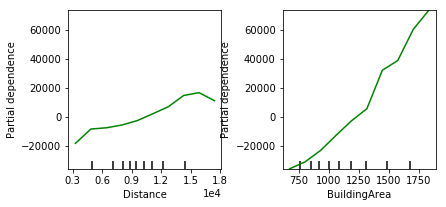

In [28]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(X, y)
my_plots = plot_partial_dependence(my_model,       
                                   features=[0, 2], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Distance', 'Landsize', 'BuildingArea'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

# Pipelines

Pipelines are a simple way to keep your data processing and modeling code organized. Specifically, a pipeline bundles preprocessing and modeling steps so you can use the whole bundle as if it were a single step.

In [29]:
from sklearn.pipeline import make_pipeline

my_pipeline = make_pipeline(Imputer(), RandomForestRegressor())

In [34]:
my_pipeline.fit(train_X,train_y)
predictions = my_pipeline.predict(val_X)
predictions

array([ 285450.        ,  169100.        ,  122730.        ,
        190630.        ,   87400.        ,   95725.        ,
        235620.8       ,  120900.        ,  701665.7       ,
        176480.        ,  193910.        ,  152960.        ,
        237067.        ,  126790.        ,  139127.5       ,
        119350.        ,  244050.        ,  136600.        ,
        149760.        ,  138784.2       ,  123270.        ,
        145850.        ,  122343.3       ,  179533.2       ,
        152140.        ,  156337.4       ,  179306.5       ,
         84850.        ,  340063.2       ,  107640.        ,
        145560.        ,  193800.        ,  124562.5       ,
        282786.3       ,  322137.2       ,  180057.        ,
        205310.        ,  114063.3       ,  233733.5       ,
        319502.2       ,  223300.        ,  139417.5       ,
        187097.2       ,  290400.        ,  333957.2       ,
        138310.        ,  116190.        ,  116450.        ,
        162195.        ,

**Understanding Pipelines**

Most scikit-learn objects are either transformers or models.

Transformers are for pre-processing before modeling. The Imputer class (for filling in missing values) is an example of a transformer. Over time, you will learn many more transformers, and you will frequently use multiple transformers sequentially.

Models are used to make predictions. You will usually preprocess your data (with transformers) before putting it in a model.

You can tell if an object is a transformer or a model by how you apply it. After fitting a transformer, you apply it with the transform command. After fitting a model, you apply it with the predict command. Your pipeline must start with transformer steps and end with a model. This is what you'd want anyway.

Eventually you will want to apply more transformers and combine them more flexibly. We will cover this later in an Advanced Pipelines tutorial.

# Cross Validation

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error')
print(scores)

[-22947.8652293  -23458.27665982 -24220.23065844]


In [66]:
print('Mean Absolute Error %2f' %(-1*scores.mean()))

Mean Absolute Error 23542.124183


# Data Leakage

**Leaky Predictors**
This occurs when your predictors include data that will not be available at the time you make predictions.
Check which predictors might depend on the target variable and drop them from training.

**Leaky Validation Strategy**
A much different type of leak occurs when you aren't careful distinguishing training data from validation data.
Be careful to not add testing data in fitting.